In [6]:
# Data loding

In [7]:
import pandas as pd
df = pd.read_csv(r"D:\2025 Data\Mobile\netflix1.csv")
print(df.head())

   Unnamed: 0 show_id     type                             title  \
0           0      s1    Movie              Dick Johnson Is Dead   
1           1      s3  TV Show                         Ganglands   
2           2      s6  TV Show                     Midnight Mass   
3           3     s14    Movie  Confessions of an Invisible Girl   
4           4      s8    Movie                           Sankofa   

          director        country date_added  release_year rating  duration  \
0  Kirsten Johnson  United States  9/25/2021          2020  PG-13    90 min   
1  Julien Leclercq         France  9/24/2021          2021  TV-MA  1 Season   
2    Mike Flanagan  United States  9/24/2021          2021  TV-MA  1 Season   
3    Bruno Garotti         Brazil  9/22/2021          2021  TV-PG    91 min   
4     Haile Gerima  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Cri

In [8]:
# Data exploration

In [9]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values for column '{column}':")
        print(df[column].unique())
        print(f"\nValue counts for coumn'{column}'':")
        print(df[column].value_counts())




(8790, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8790 non-null   int64 
 1   show_id       8790 non-null   object
 2   type          8790 non-null   object
 3   title         8790 non-null   object
 4   director      8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
dtypes: int64(2), object(9)
memory usage: 755.5+ KB
None
Unnamed: 0      0
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
        Unnamed: 0  release_year
count  8790.000000   8790.000000
me

In [10]:
# Data cleaning

In [11]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check if duplicates were remoevd

print(f"Orginal Shape: {df.shape}, New shape: {df_cleaned.shape}")

Unnamed: 0      0
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
Orginal Shape: (8790, 11), New shape: (8790, 11)


In [12]:
# Data analysis

In [13]:
# Descriptive statistics for numerical columns
print(df_cleaned.describe())

# Explore the distribution of categorical variables
print(df_cleaned['type'].value_counts())
print(df_cleaned['rating'].value_counts())
print(df_cleaned['listed_in'].value_counts())
print(df_cleaned['country'].value_counts())

# Analyze the relationship between release_year and type
print(df_cleaned.groupby(['release_year','type'])['show_id'].count())

# Analyze the distribution of duration for different types of shows
print(df_cleaned.groupby('type')['duration'].value_counts())

# Correlation between numerical variables (if any)
numerical_cols = df_cleaned.select_dtypes(include=['number'])
print(numerical_cols.corr())    

        Unnamed: 0  release_year
count  8790.000000   8790.000000
mean   4394.500000   2014.183163
std    2537.598767      8.825466
min       0.000000   1925.000000
25%    2197.250000   2013.000000
50%    4394.500000   2017.000000
75%    6591.750000   2019.000000
max    8789.000000   2021.000000
type
Movie      6126
TV Show    2664
Name: count, dtype: int64
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64
listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
TV Action &

In [14]:
# Data Visualization

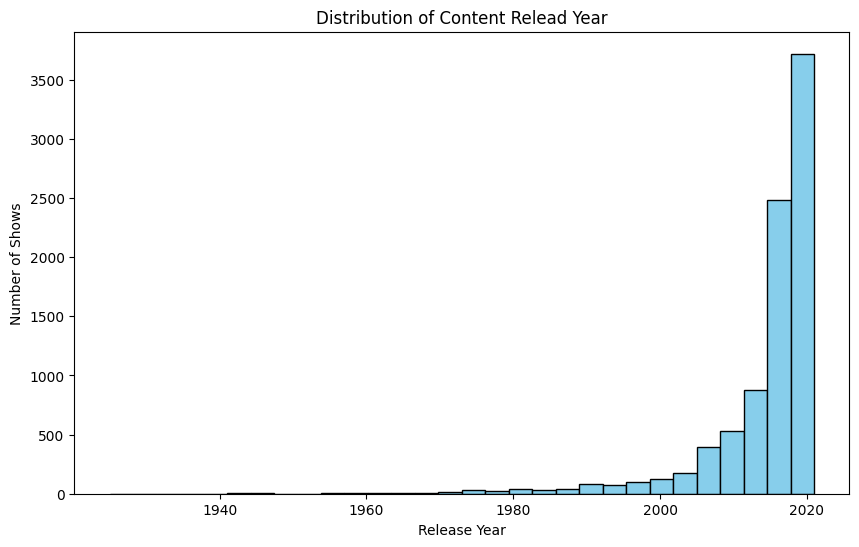

In [16]:
import matplotlib.pyplot as plt

# histogram for numerical columns
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Content Relead Year')
plt.xlabel('Release Year')  
plt.ylabel('Number of Shows')
plt.show()

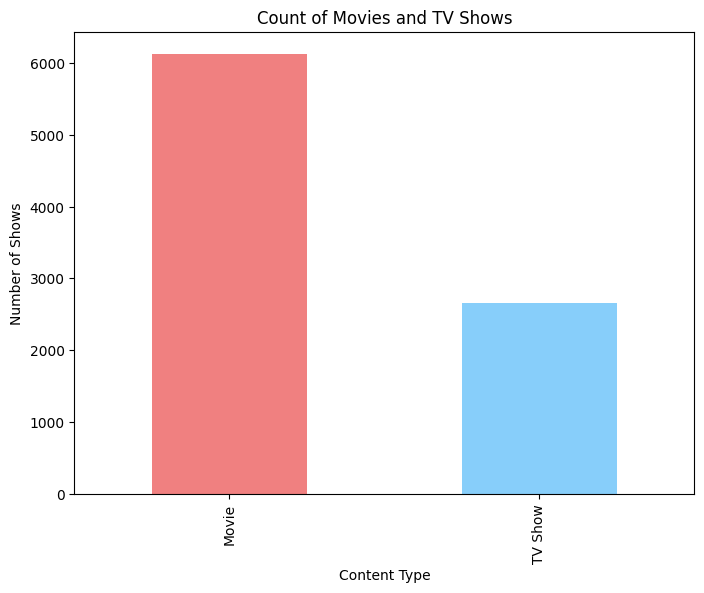

In [17]:
import matplotlib.pyplot as plt

# Bar chart for content type
plt.figure(figsize=(8, 6))
df_cleaned['type'].value_counts().plot(kind='bar', color=['lightcoral', 'lightskyblue'])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Number of Shows')
plt.show()

In [18]:
# visualize the distribution of different ratings using a bar chart.

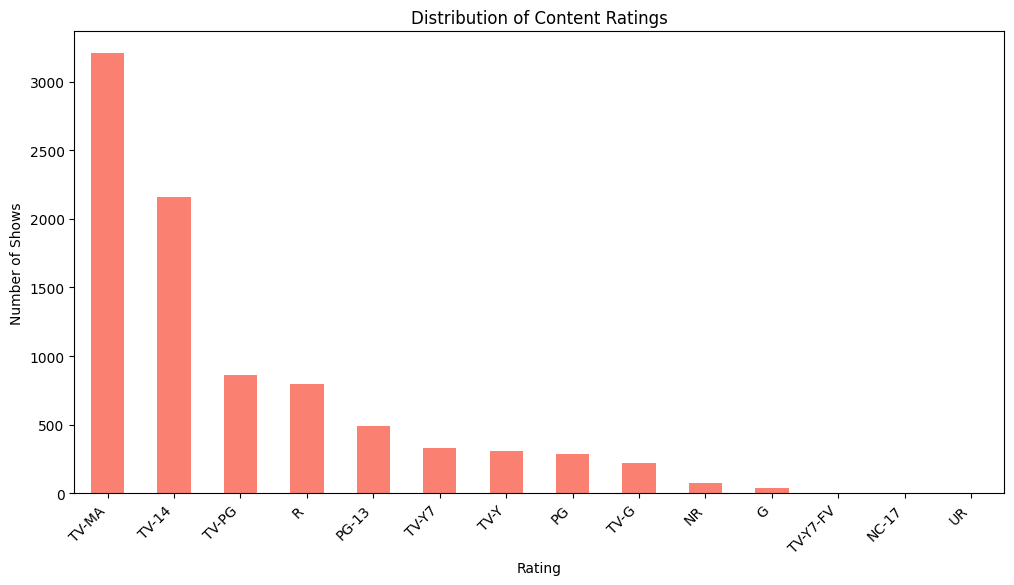

In [19]:
import matplotlib.pyplot as plt

# Bar chart for rating distribution
plt.figure(figsize=(12, 6))
df_cleaned['rating'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# Visualizeing the top 10 most frequent genres (listed_in).

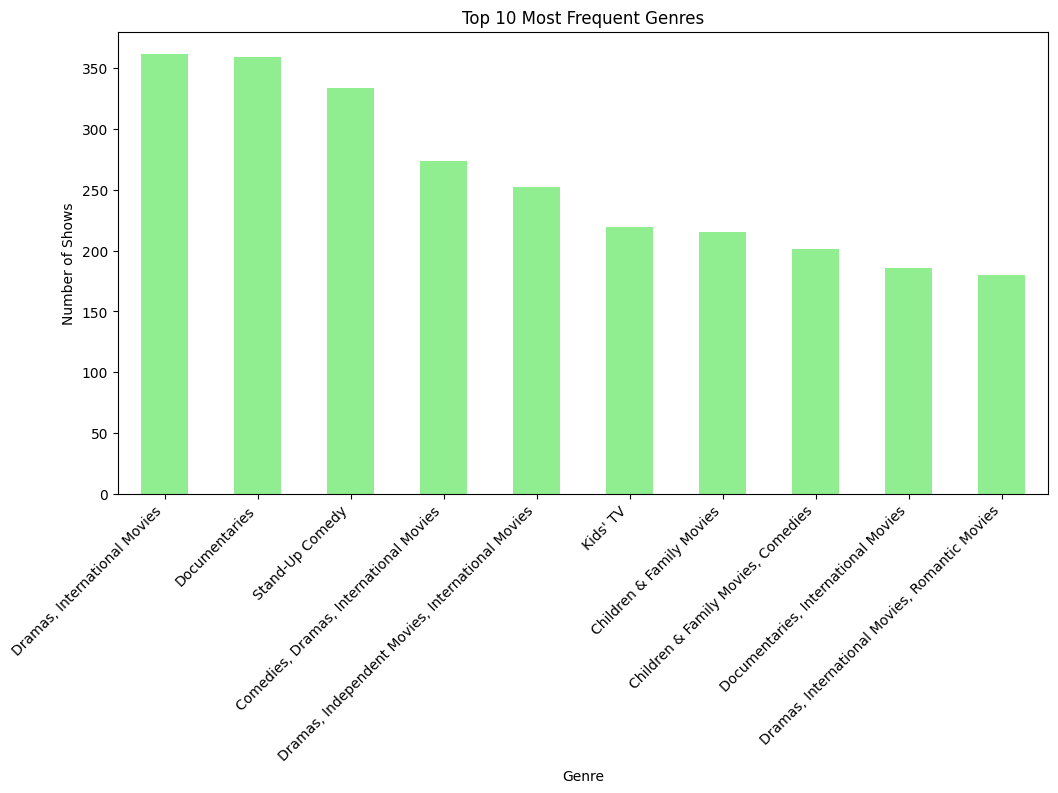

In [21]:
import matplotlib.pyplot as plt

# Bar chart for top 10 genres
plt.figure(figsize=(12, 6))
df_cleaned['listed_in'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
# showing the top 10 countries with the highest number of productions.

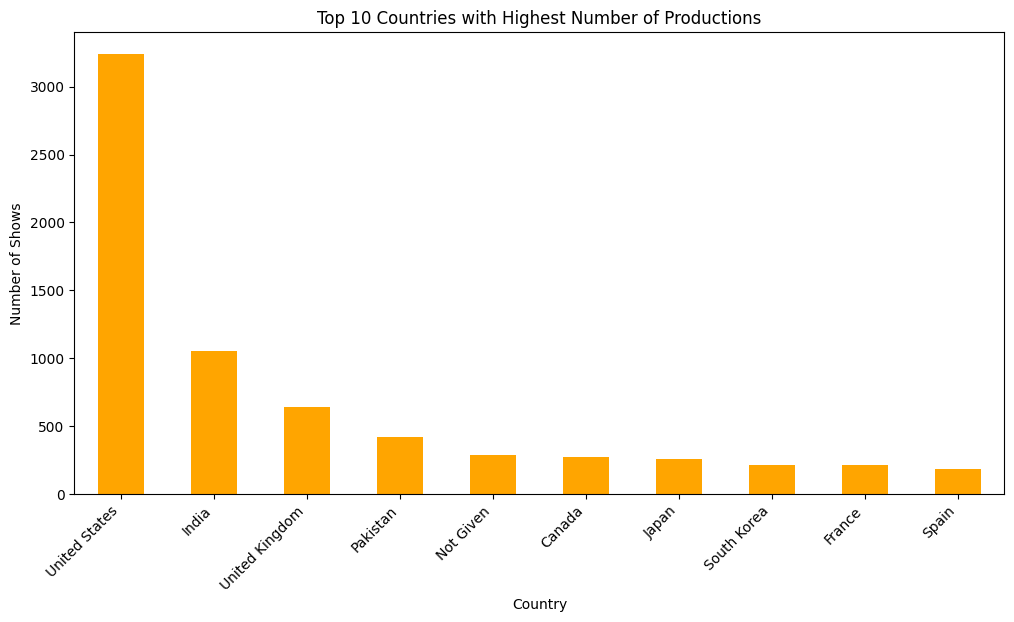

In [24]:
import matplotlib.pyplot as plt

# Bar chart for top 10 countries with highest number of productions
plt.figure(figsize=(12, 6))
df_cleaned['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries with Highest Number of Productions')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.show()